# 1. Opening Google Colaboratory File

---



# 2. Required Libraries

---



In [112]:
# importing libs
import pandas as pd
import numpy as nm
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# 3. Exploratory Data Analysis

---



In [113]:
#loading data
dataset=pd.read_csv("insurance.csv")

In [114]:
# understanding data
dataset.shape

(1338, 7)

In [115]:
# understanding data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [116]:
# understanding data
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [117]:
# understanding data
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


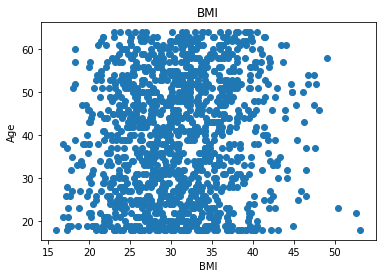

In [118]:
# analyze bmi
plt.scatter(x=dataset["bmi"], y=dataset["age"])
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("BMI")
plt.show()

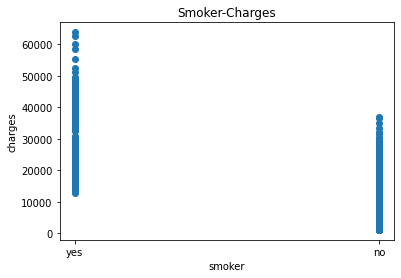

In [119]:
# relation between smoker-charges
plt.scatter(x=dataset["smoker"], y=dataset["charges"])
plt.xlabel("smoker")
plt.ylabel("charges")
plt.title("Smoker-Charges")
plt.show()

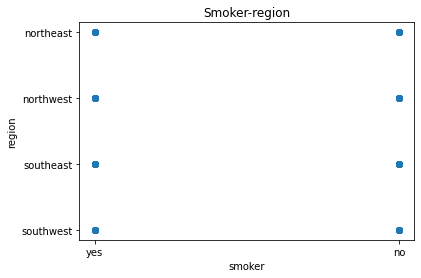

In [120]:
# relation between smoker-region
plt.scatter(x=dataset["smoker"], y=dataset["region"])
plt.xlabel("smoker")
plt.ylabel("region")
plt.title("Smoker-region")
plt.show()

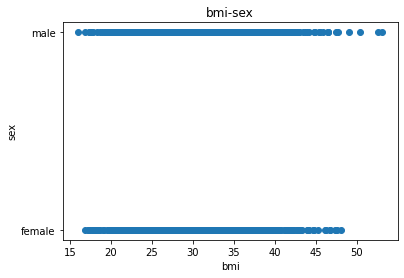

In [121]:
# relation between bmi-sex
plt.scatter(x=dataset["bmi"], y=dataset["sex"])
plt.xlabel("bmi")
plt.ylabel("sex")
plt.title("bmi-sex")
plt.show()

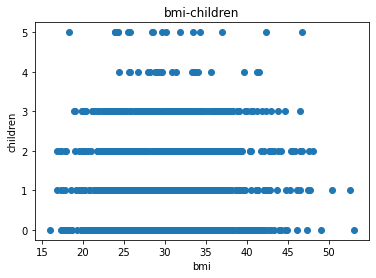

In [122]:
# relation between bmi-children
plt.scatter(x=dataset["bmi"], y=dataset["children"])
plt.xlabel("bmi")
plt.ylabel("children")
plt.title("bmi-children")
plt.show()

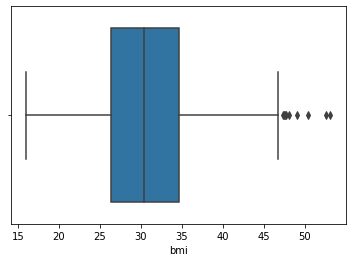

In [123]:
#outlier
sb.boxplot(x=dataset["bmi"])

In [124]:
#outlier

print("Highest allowed",dataset['bmi'].mean() + 3*dataset['bmi'].std())
print("Lowest allowed",dataset['bmi'].mean() - 3*dataset['bmi'].std())


# outlier çıkarılmış hali
new_df = dataset[(dataset['bmi'] < 48.96) & (dataset['bmi'] > 12.37)]
new_df

Highest allowed 48.95795759602359
Lowest allowed 12.368836125949507


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


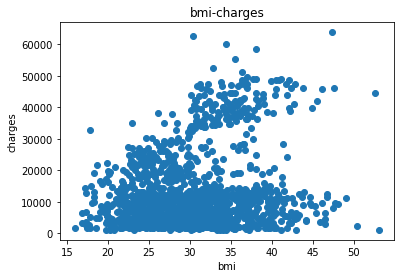

In [125]:
# relation between bmi-charges
plt.scatter(x=dataset["bmi"], y=dataset["charges"])
plt.xlabel("bmi")
plt.ylabel("charges")
plt.title("bmi-charges")
plt.show()

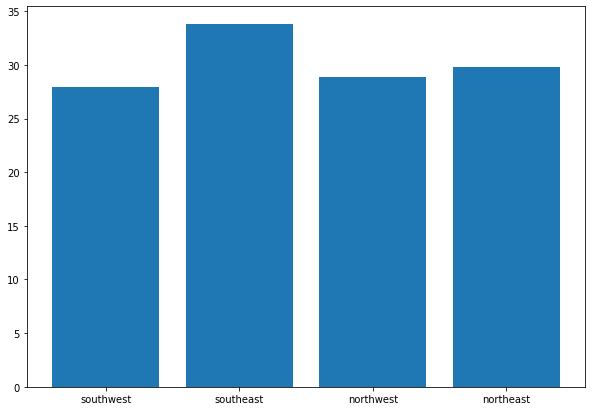

In [126]:
region = dataset['region'].head(10)
smoker = dataset['smoker'].head(10)
bmi = dataset['bmi'].head(10)
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(region[0:20], bmi[0:20])
 
# Show Plot
plt.show()

# 4. Data Preprocessing

---



In [127]:
# label encoding
labelEncoder = LabelEncoder()
dataset["sex"] = labelEncoder.fit_transform(dataset["sex"].values)
dataset["smoker"] = labelEncoder.fit_transform(dataset["smoker"].values)
dataset["region"] = labelEncoder.fit_transform(dataset["region"].values)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [128]:
# creating variables for futures
X = dataset.loc[:, ["age", "sex", "bmi", "children", "smoker", "region"]]
y = dataset.loc[:, "charges"]

train, test = train_test_split(dataset, test_size=0.3)

# creating X_train and y_train for model
X_train = train.drop("charges", axis=1)
y_train = train.loc[:, "charges"]

# creating X_test and y_test for model
X_test = test.drop("charges", axis=1)
y_test = test.loc[:, "charges"]

In [129]:
# normalize dataset

d = normalize(train)
names=train.columns
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()
scaled_df.shape

(936, 7)

In [130]:
# scaling 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# 5. Model Selection

---



In [131]:
# linear regression

linmodel = LinearRegression()
lr = linmodel.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)


print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")

# cross validation
cvs=cross_val_score(estimator=linmodel, X=X_train, y=y_train,cv=10)
cvs_mean=cvs.mean()
print(f"Cross-Validation: {cvs_mean}")

R2: 0.7548172110302381
MAE: 4020.0275771713714
MSE: 30282412.263008393
Cross-Validation: 0.7372866134809136


# **Best** performing model-Polynomial Regression

---



In [132]:
# polynomial regression

poly_reg = PolynomialFeatures(degree=5)

X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
poly = pol_reg.fit(X_poly, y)

y_poly_pred = pol_reg.predict(X_poly)

print(f"R2: {r2_score(y,y_poly_pred)}")
print(f"MAE: {mean_absolute_error(y,y_poly_pred)}")
print(f"MSE: {mean_squared_error(y,y_poly_pred)}")


# cross validation
cvs=cross_val_score(estimator=poly, X=X_train, y=y_train,cv=10)
cvs_mean=cvs.mean()
print(f"Cross-Validation: {cvs_mean}")


R2: 0.8411925923335958
MAE: 3308.350340985575
MSE: 23272076.859103553
Cross-Validation: 0.7372866134809136



# 6. Hyper-parameter Optimization
---



In [133]:
# Lasso Regression

lasso = Lasso().fit(X_train, y_train)
lasso.score(X_test, y_test)

0.7548447268923199

In [134]:
# Gridsearch - Lasso

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator = lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.738710432909296
Best Params:  {'alpha': 100}


In [135]:
# Ridge Regression

ridge = Ridge().fit(X_train,y_train) 
ridge.score(X_test, y_test)

0.7549021882752716

In [136]:
# Gridsearch - Ridge

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid2 = GridSearchCV(estimator = ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid2_result = grid2.fit(X_train, y_train)
print('Best Score: ', grid2_result.best_score_)
print('Best Params: ', grid2_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7386554171418551
Best Params:  {'alpha': 10}
